### A complete outline for an End-to-End Credit Card Fraud Detection Project using K-Nearest Neighbors (KNN), tailored for a well-structured machine learning pipeline. This will include:

* #### Problem Understanding

* #### Data Preprocessing

* #### Model Building (KNN)

* #### Evaluation

* #### Deployment

### Problem Understanding
**Objective:**
> Detect fraudulent credit card transactions using historical data.

**Dataset:**
> We've used the publicly available Kaggle Credit Card Fraud Dataset.
`https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud`

> Features are PCA-transformed (V1 to V28) + Time and Amount.

> Class is the target:

    -> 0 = Legitimate
    -> 1 = Fraudulent

### Step 1: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,284797,284798,284799,284800,284801,284802,284803,284804,284805,284806
Time,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,4.000000,7.000000,7.000000,9.000000,...,172782.000000,172782.000000,172783.000000,172784.000000,172785.000000,172786.000000,172787.000000,172788.000000,172788.000000,172792.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233,-0.425966,1.229658,-0.644269,-0.894286,-0.338262,...,-0.241923,0.219529,-1.775135,2.039560,0.120316,-11.881118,-0.732789,1.919565,-0.240440,-0.533413
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737,0.960523,0.141004,1.417964,0.286157,1.119593,...,0.712247,0.881246,-0.004235,-0.175233,0.931005,10.071785,-0.055080,-0.301254,0.530483,-0.189733
V3,2.536347,0.166480,1.773209,1.792993,1.548718,1.141109,0.045371,1.074380,-0.113192,1.044367,...,0.399806,-0.635891,1.189786,-1.196825,-0.546012,-9.834783,2.035030,-3.249640,0.702510,0.703337
V4,1.378155,0.448154,0.379780,-0.863291,0.403034,-0.168252,1.202613,-0.492199,-0.271526,-0.222187,...,-0.463406,0.960928,0.331096,0.234580,-0.745097,-2.066656,-0.738589,-0.557828,0.689799,-0.506271
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193,0.420987,0.191881,0.948934,2.669599,0.499361,...,0.244531,-0.152971,1.196063,-0.008713,1.130314,-5.364473,0.868229,2.630515,-0.377961,-0.012546
V6,0.462388,-0.082361,1.800499,1.247203,0.095921,-0.029728,0.272708,0.428118,3.721818,-0.246761,...,-1.343668,-1.014307,5.519980,-0.726571,-0.235973,-2.606837,1.058415,3.031260,0.623708,-0.649617
V7,0.239599,-0.078803,0.791461,0.237609,0.592941,0.476201,-0.005159,1.120631,0.370145,0.651583,...,0.929369,0.427126,-1.518185,0.017050,0.812722,-4.918215,0.024330,-0.296827,-0.686180,1.577006
V8,0.098698,0.085102,0.247676,0.377436,-0.270533,0.260314,0.081213,-3.807864,0.851084,0.069539,...,-0.206210,0.121340,2.080825,-0.118228,0.115093,7.305334,0.294869,0.708417,0.679145,-0.414650
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739,-0.568671,0.464960,0.615375,-0.392048,-0.736727,...,0.106234,-0.285670,1.159498,0.435402,-0.204064,1.914428,0.584800,0.432454,0.392087,0.486180


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [1]:
print(df['Class'][df['Class']==1])  # To check class imbalance

NameError: name 'df' is not defined

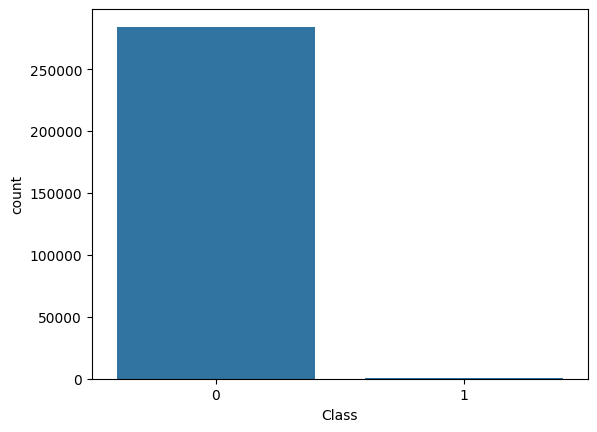

In [9]:
sns.countplot(x='Class', data=df)
plt.show()

In [10]:
# Feature Scaling: Scale Amount and Time only.
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [11]:
# Move Class column to the end
cols = [col for col in df if col != 'Class'] + ['Class']
df = df[cols]

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541,0


In [12]:
# Train-Test Split
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

###  Step 2: Model Building (KNN)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Step 3: Evaluation

In [14]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[56857     7]
 [   19    79]]


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [16]:
print("ROC AUC Score:", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

ROC AUC Score: 0.9437557064187521


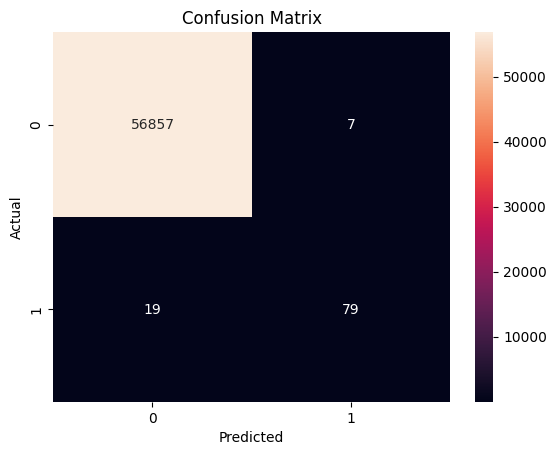

In [17]:
# Confusion Matrix Plot

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Step 4: Handling Imbalance
Try under-sampling the majority class:

In [18]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(len(fraud))  # downsample

df_balanced = pd.concat([fraud, non_fraud])
X_bal = df_balanced.drop('Class', axis=1)
y_bal = df_balanced['Class']

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42)

knn.fit(X_train_bal, y_train_bal)
print(classification_report(y_test_bal, knn.predict(X_test_bal)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        99
           1       0.98      0.94      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [19]:
import pickle
pickle.dump(knn, open("knn_model.pkl", "wb"))